In [240]:

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

data_water = pd.read_csv("../data/water_quality_prediction_data/water_potability.csv")

data_water.isnull().sum()/len(data_water)



ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

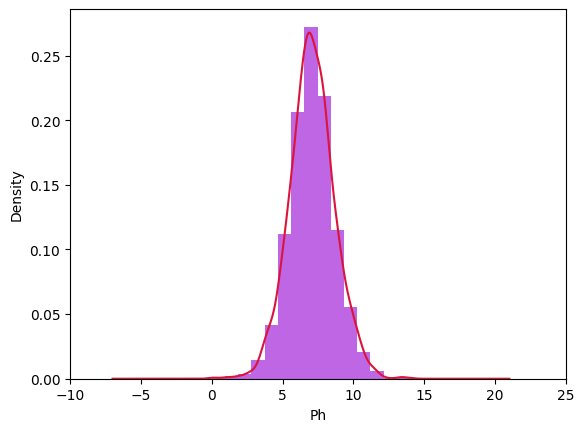

In [241]:
ax = data_water["ph"].hist(bins=15, density=True, stacked=True, color='darkviolet', alpha=0.6)
data_water["ph"].plot(kind='density', color='crimson')
ax.set(xlabel='Ph')
plt.xlim(-10,25)

plt.show()

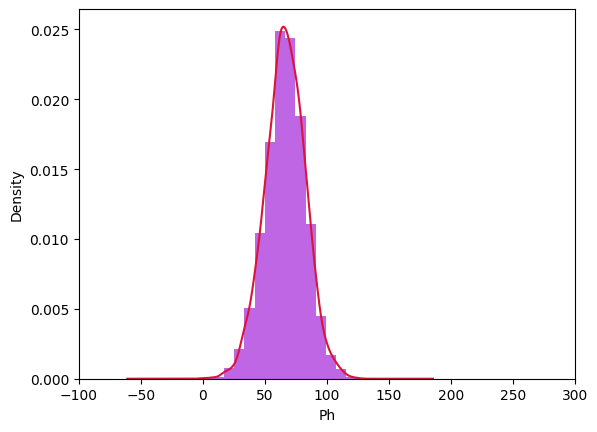

In [242]:
ax = data_water["Trihalomethanes"].hist(bins=15, density=True, stacked=True, color='darkviolet', alpha=0.6)
data_water["Trihalomethanes"].plot(kind='density', color='crimson')
ax.set(xlabel='Ph')
plt.xlim(-100, 300)

plt.show()

In [243]:
mean_ph = data_water['ph'].mean(skipna= True)
mean_tri = data_water['Trihalomethanes'].mean(skipna = True)
data_water['ph'].fillna(mean_ph, inplace = True)
data_water['Trihalomethanes'].fillna(mean_tri, inplace= True)

In [244]:
target = 'Potability'
missing = 'Sulfate'
X = data_water.drop(columns= [target ,missing])
y = data_water[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

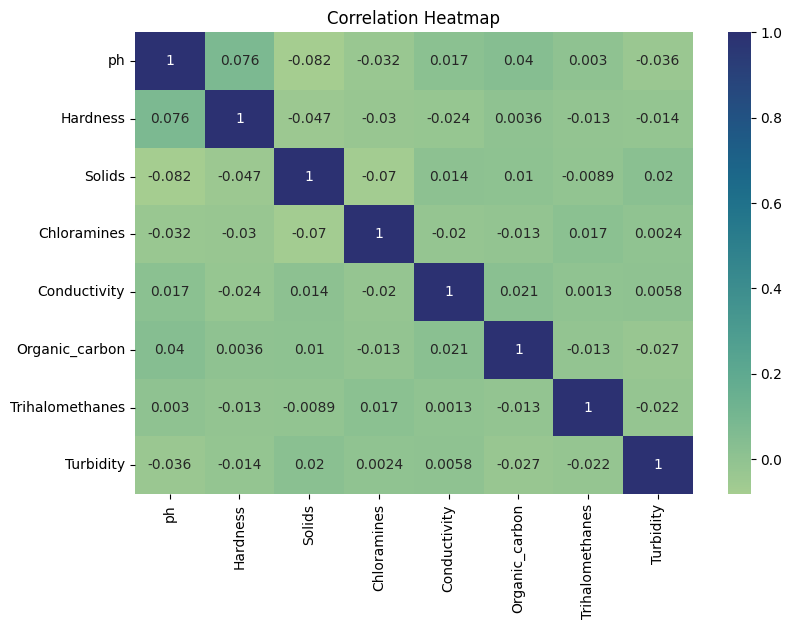

In [245]:
# Correlation heatmap

X_standardized = pd.DataFrame(StandardScaler().fit_transform(X), columns = X_train.columns)

plt.figure(figsize=(9, 6))
sns.heatmap(X_standardized.corr(), annot=True, cmap='crest')
plt.title('Correlation Heatmap')

plt.show()

In [248]:

from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model)
rfe = rfe.fit(X, y)

print(list(X.columns[rfe.support_]))

['ph', 'Chloramines', 'Organic_carbon', 'Turbidity']


0.5890992493744789


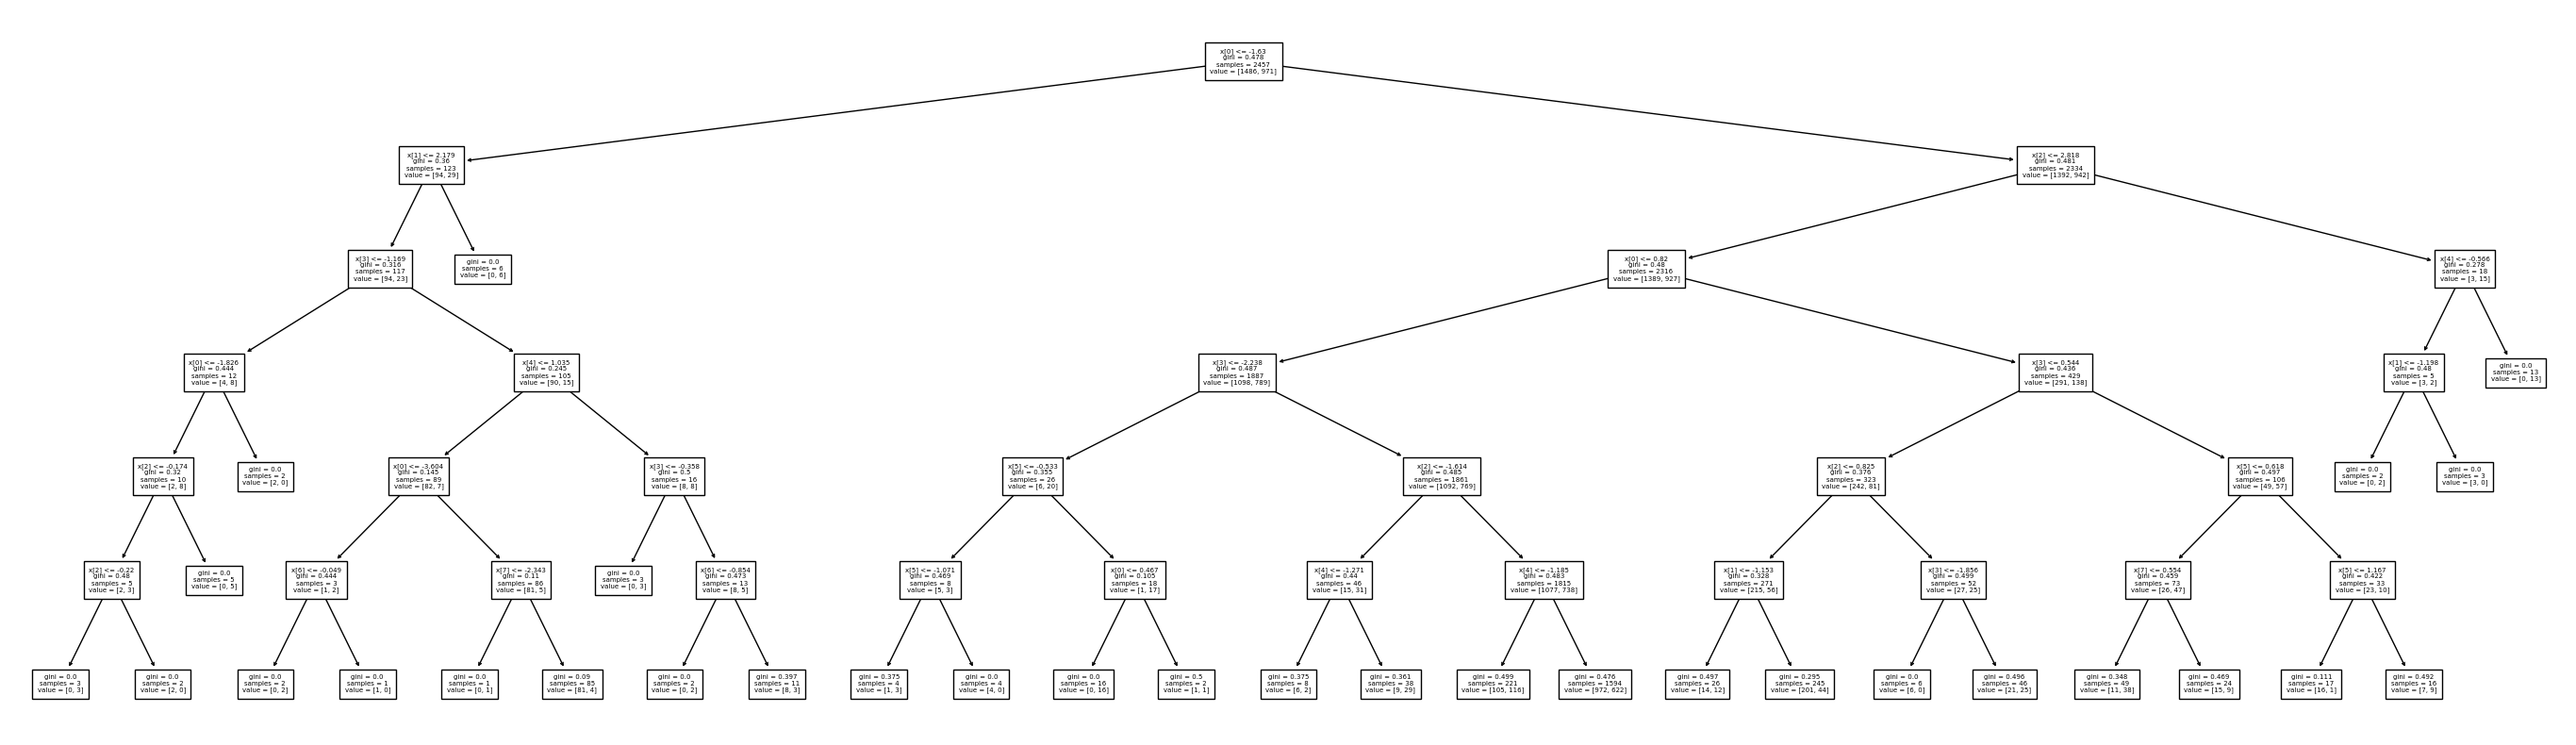

In [ ]:
# build pipeline consturction for analysis

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state = 33, max_depth=6))
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

print(cross_val_score(pipe ,X, y, cv=30).mean())

plt.figure(figsize=(35, 10))

# print(pipe.get_params())
tree.plot_tree(pipe.named_steps['decisiontreeclassifier'], fontsize= 5)
plt.show()


In [ ]:
# build pipeline consturction for analysis

pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state = 33))
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

print(cross_val_score(pipe ,X, y, cv=30).mean())

plt.figure(figsize=(35, 10))

# print(pipe.get_params())
tree.plot_tree(pipe.named_steps['decisiontreeclassifier'], fontsize= 5)
plt.show()



0.6101973867111481


KeyError: 'decisiontreeclassifier'

<Figure size 3500x1000 with 0 Axes>

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[512,   0],
       [307,   0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

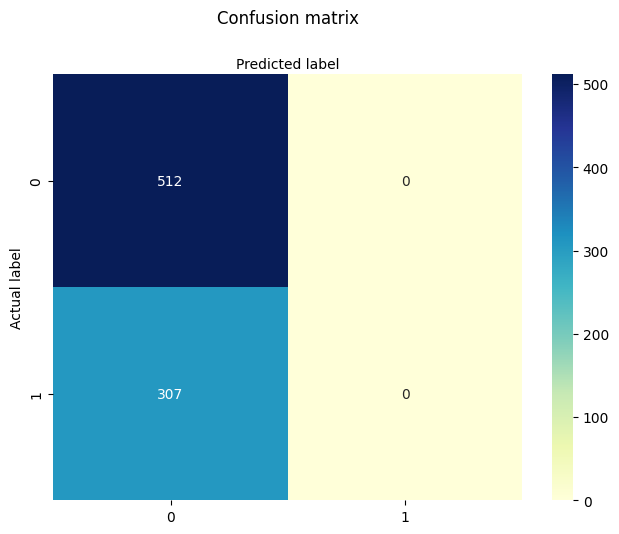

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.63      1.00      0.77       512
           0       0.00      0.00      0.00       307

    accuracy                           0.63       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.63      0.48       819



c:\Users\leedh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leedh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leedh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

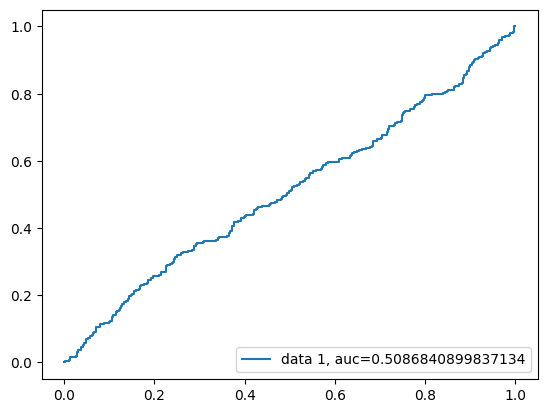

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()